In [ ]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import sklearn

from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

#Logistic Regression

##Step 1: Load the dataset

We will use a dataset of breast cancer.

In [ ]:
sklearn. __version__ 

'0.22.2.post1'

In [ ]:
cancer_dataset = load_breast_cancer()

###Exploring the dataset!

In [ ]:
# What are inside cancer_dataset?
cancer_dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
# What are feature names?
print(cancer_dataset.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# What are target names?
print(cancer_dataset.target_names)

['malignant' 'benign']


To access data, use ``cancer.data``. In this simple problem, we only take $2$ features: 'mean radius' (index $0$) and 'mean texture' (index $1$). Therefore, we use ``cancer_dataset.data[:, 0:2 ]``.

For the target, we can use ``cancer.target`` to get it.

In [ ]:
X = cancer_dataset.data[:, 0:2]
y = cancer_dataset.target

Print the first five samples.

In [ ]:
print('X (features) of the first five samples: \n', X[0:5, :])

X (features) of the first five samples: 
 [[17.99 10.38]
 [20.57 17.77]
 [19.69 21.25]
 [11.42 20.38]
 [20.29 14.34]]


In [ ]:
print('y (target) of the first five samples: \n', y[0:5])

y (target) of the first five samples: 
 [0 0 0 0 0]


###Count number of samples of each class.

We use `np.unique()` to count the number of samples for each class. 

In [ ]:
unique, counts = np.unique(y, return_counts = True)

print(unique)
print(counts)

[0 1]
[212 357]


So we have $212$ samples of class $0$ and $357$ samples of class $1$.

Ratio: $212/357 = 0.593$

We can use [`zip()`](https://www.w3schools.com/python/ref_func_zip.asp) and [`dict()`](https://www.w3schools.com/python/ref_func_dict.asp) to form a dictionary for more compact result.

In [ ]:
dict(zip(unique, counts))

{0: 212, 1: 357}

###Train / Test split.

As usual, let's split the dataset. 

Note: In some classification problems we do not have a balanced number of samples for each class. In this case, it is desirable to split the dataset into training and test sets in such a way that the partition preserves (as much as possible) the same proportions of samples in each class as observed in the original dataset.

This method of spliting is called a stratified spliting.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1010, stratify = y)

####Activity 1: Check the ratio of samples of two classes in the train and test sets.

Count the numbers of samples of two classes in the train and test sets. Check the required ratio and compare with the ratio in the original dataset. `np.unique()` is helpful here.

In [ ]:
# Your code

# Ratio in the training set
unique, counts = np.unique(y_train, return_counts = True)
print('Class[0]:Class[1] in the training set: {:.3f}'.format(counts[0]/counts[1]))

# Ratio in the test set
unique, counts = np.unique(y_test, return_counts = True)
print('Class[0]:Class[1] in the test set: {:.3f}'.format(counts[0]/counts[1]))

Class[0]:Class[1] in the training set: 0.592
Class[0]:Class[1] in the test set: 0.598


##Step 2: Create a Logistic Regression classifier and train it.

Import the library from sklearn.

In [ ]:
from sklearn.linear_model import LogisticRegression

Then define your Logistic Regression classifier and train it.

Why ``penalty = 'none'``, read this [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [ ]:
my_LogiR = LogisticRegression(penalty = 'none')

In [ ]:
my_LogiR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

####Activity 2: Print out the weights and the intercept.

Very much similar to what we have done in Linear Regression lesson, print out $\omega$'s and $c$.

In [ ]:
# Your code
print('Weights = ', my_LogiR.coef_)
print('Intercept = ', my_LogiR.intercept_)

Weights =  [[-1.0208996  -0.22513099]]
Intercept =  [19.50466994]


##Step 3: Test the classifier on the test set.

We will use function `my_knn.score()` to obtain the **accuracy** of the classifier on the test set. For other fuctions of Logistic Regression classifier, see this [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [ ]:
test_acc = my_LogiR.score(X_test, y_test)
print('Accuracy on test set = %.2f' % test_acc)

Accuracy on test set = 0.87


Let's explore other functions of the KNN classifier.

- Generate a "fake" sample.
- Use `my_LogiR.predict()` to predict the class of this sample.

In [ ]:
new_sample = [[11, 11]]
new_sample_pred = my_LogiR.predict(new_sample)

# Print out the result:
print(type(new_sample_pred), new_sample_pred.shape)
print('Result of the new sample =', new_sample_pred[0])
new_sample_pred

<class 'numpy.ndarray'> (1,)
Result of the new sample = 1


array([1])

#Visualize the data

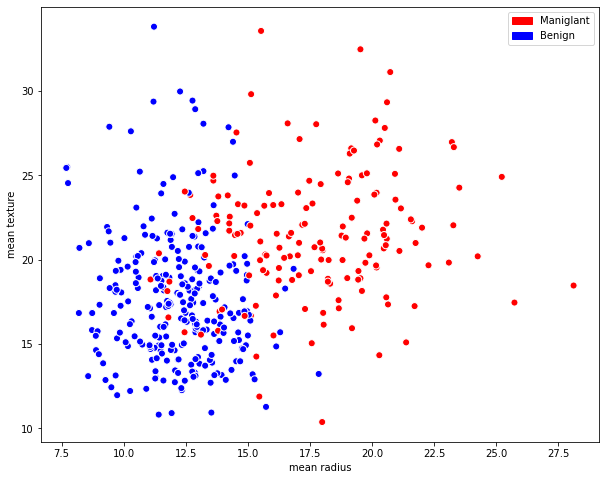

In [ ]:
cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])
plot_symbol_size = 50

plt.figure(figsize = (10,8))

plt.scatter(X_train[:, 0], X_train[:, 1], s = plot_symbol_size, c = y_train, cmap = cmap_bold, edgecolor = 'white')

patch0 = mpatches.Patch(color='#FF0000', label='Maniglant')
patch1 = mpatches.Patch(color='#0000FF', label='Benign')
plt.legend(handles=[patch0, patch1])

plt.xlabel('mean radius')
plt.ylabel('mean texture')

plt.show()

#Plot the boundary

We have to generate a many fake data points as illustated in the lecture.

For detail of how to generate those points, refer to the notebook of KNN classifier.

####Activity 3: Complete the functions below.

In [ ]:
def plot_Boundary_BreastCancer_LogiR(X, y):
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

    # Create a Logistic Regression model
    my_LogiR = LogisticRegression(penalty = 'none')

    # Train it
    my_LogiR.fit(X, y)

    mesh_step_size = .1  # step size in the mesh
    plot_symbol_size = 50

    # Determine the min and max of the first feature, i.e., the first column of X (X[:, 0])
    # We can add some margin. In this case is 1.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    # Determine the min and max of the second feature, i.e., the second column of X (X[:, 1])
    # We can add some margin. In this case is 1.
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    
    fake_Data_Points = np.c_[xx.ravel(), yy.ravel()]
    
    fake_Data_Points_Pred = my_LogiR.predict(fake_Data_Points)

    # Reshape the result into the form of a matrix
    Z = fake_Data_Points_Pred.reshape(xx.shape)

    plt.figure(figsize = (10,8))
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

    # Plot training points
    plt.scatter(X[:, 0], X[:, 1], s = plot_symbol_size, c = y, cmap = cmap_bold, edgecolor = 'white')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='Maniglant')
    patch1 = mpatches.Patch(color='#0000FF', label='Benign')
    plt.legend(handles=[patch0, patch1])

    plt.xlabel('mean radius')
    plt.ylabel('mean texture')
    plt.title("Boundary - Generate fake data points")

    plt.show()

## Plot the boundary: Generate fake data points

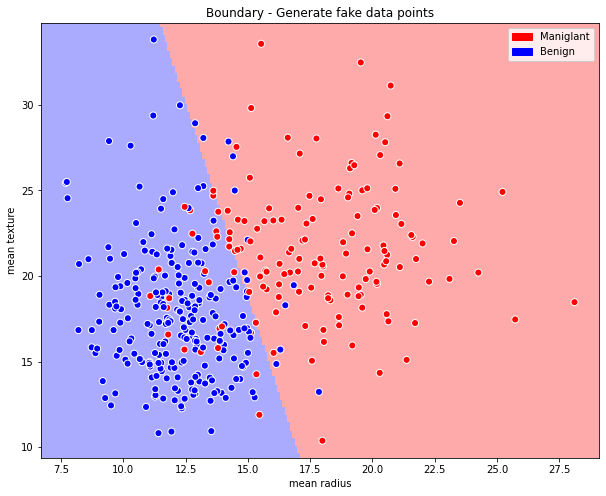

In [ ]:
plot_Boundary_BreastCancer_LogiR(X_train, y_train)

###Activity 4: What do observe about the bounday of Logistic Regression Classifier?

In the plot above, the model predicts a boundary that separates most of the two classes with the exception of a small number of errors. There are no specific islands of boundary like in most cases of overfitting.

The decision boundary is close to the theoretical boundary. Looks like a balanced fit model.



## Plot the boundary: Theoretical boundary

How to get $\omega_1$, $\omega_2$, and $c$? 

In [ ]:
# We did this:
print('Weights = ', my_LogiR.coef_) #Weights =  [[-1.03415999 -0.22820527]]
print('Intercept = ', my_LogiR.intercept_) #Intercept =  [19.75534194]

Weights =  [[-1.0208996  -0.22513099]]
Intercept =  [19.50466994]


In [ ]:
w1 = my_LogiR.coef_[0][0]
w2 = my_LogiR.coef_[0][1]
c = my_LogiR.intercept_

####Activity 5: Plot the theoretical boundary.

Refer to the formula given in the lecture note!

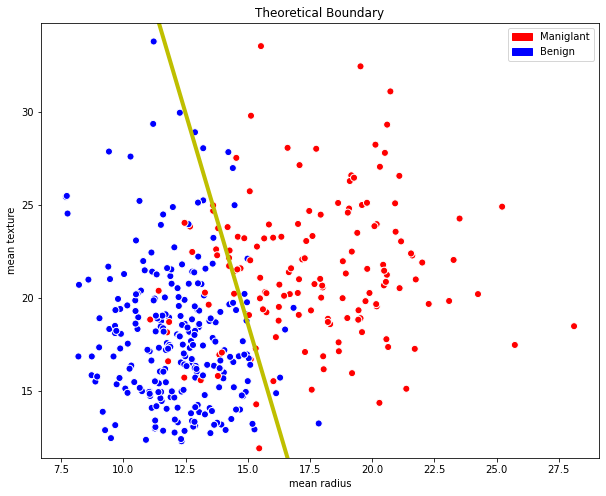

In [ ]:
plt.figure(figsize = (10,8))

# Generate 1000 values of x1 from 5 to 30
# You can change the two ends if you want
x1 = range(5,31)

# Calculate x2 = (-w1*x1 - c)/w2 as given in the lecture note.
x2 = (-w1*x1 - c)/w2

# Plot the theoretical boundary
plt.plot(x1, x2, '-y', linewidth = 4)

# Plot samples of the training set
plt.scatter(X_train[:, 0], X_train[:, 1], s = plot_symbol_size, c = y_train, cmap = cmap_bold, edgecolor = 'white')

patch0 = mpatches.Patch(color='#FF0000', label='Maniglant')
patch1 = mpatches.Patch(color='#0000FF', label='Benign')
plt.legend(handles=[patch0, patch1])

plt.xlim(X_train[:, 0].min()-1, X_train[:, 0].max()+1)
plt.ylim(X_train[:, 1].min()+1, X_train[:, 1].max()+1)

plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title("Theoretical Boundary")

plt.show()